# Stock Analysis Project  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Portfolio of Bank Stocks**

In [2]:
# Bank of America
BAC = pd.read_csv("BAC.csv",parse_dates=True,index_col='Date')

# JP Morgan
JPM = pd.read_csv("JPM.csv",parse_dates=True,index_col='Date')

# CitiGroup
C = pd.read_csv('C.csv',parse_dates=True,index_col='Date')

# HSBC
HSBC = pd.read_csv("HSBC.csv",parse_dates=True,index_col='Date')

#Royal Bank of Canada
RY = pd.read_csv("RY.csv",parse_dates=True,index_col='Date')

#### List and Dictionary

In [3]:
portfolio_list = [BAC,JPM,C,HSBC,RY]

In [4]:
portfolio_dict = {'BAC':BAC,'JPM':JPM,'C':C,'HSBC':HSBC,'RY':RY}

-----------------------

### Part One: Returns Analysis
-----------

**The start date and the end date for the price history of these stocks.**

In [5]:
# Start Date
print(BAC.index[0])

2016-09-06 00:00:00


In [6]:
# End Date
BAC.index[-1]

Timestamp('2021-09-03 00:00:00')

#### The start date of these stocks is 09/06/2016 and the end date for the price history of these stocks is 09/03/2021

**A line plot showing the Adj. Close prices over the last 5 years for all the stocks in the portfolio.**

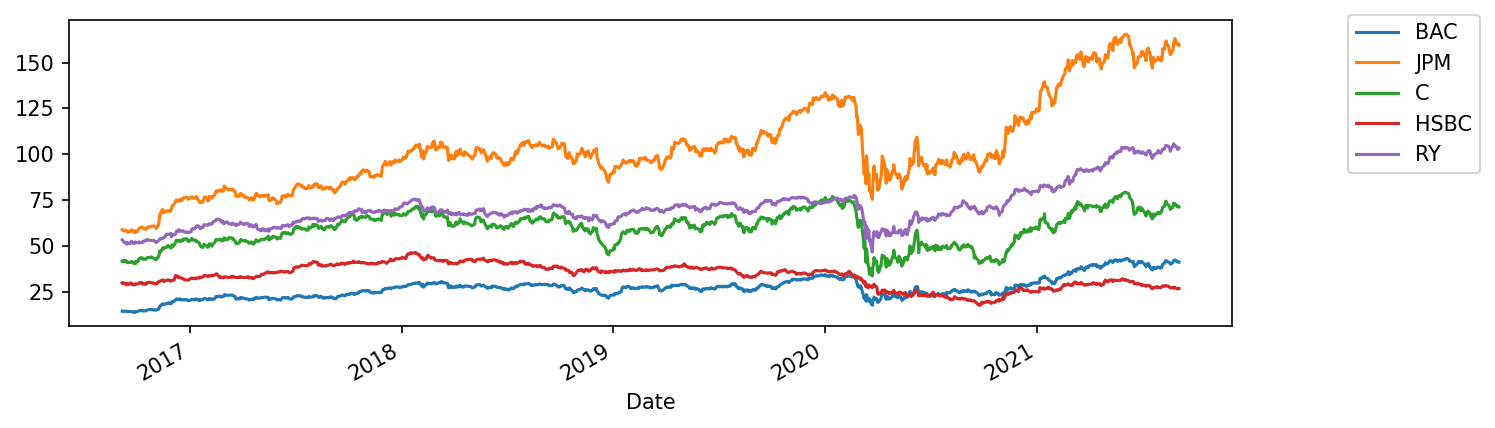

In [7]:
fig, ax = plt.subplots(dpi=150, figsize=(10,3))
BAC["Adj Close"].plot(ax=ax, label="BAC")
JPM["Adj Close"].plot(ax=ax, label="JPM")
C["Adj Close"].plot(ax=ax, label="C")
HSBC["Adj Close"].plot(ax=ax, label="HSBC")
RY["Adj Close"].plot(ax=ax, label="RY")
plt.legend(loc=(1.1,0.5))

**A function that takes in the Adj. Close price series, and then can calculate the stocks percent rise or decline from any set of given dates.**

In [8]:
def perc_calc(ticker,start_date,end_date):
    if start_date not in ticker['Adj Close'].index or end_date not in ticker["Adj Close"].index:
        return f"Start or End dates not in index of Series"
    
    adj_close_start = ticker['Adj Close'][start_date]
    adj_close_end = ticker['Adj Close'][end_date]
    percent_change = 100*(adj_close_end-adj_close_start)/adj_close_start
    return f"Percent Change: {np.round(percent_change,2)}%"

In [9]:
perc_calc(BAC,'2016-09-06','2021-09-03')

'Percent Change: 187.74%'

**A histogram of the daily returns for each stock in the portfolio:**

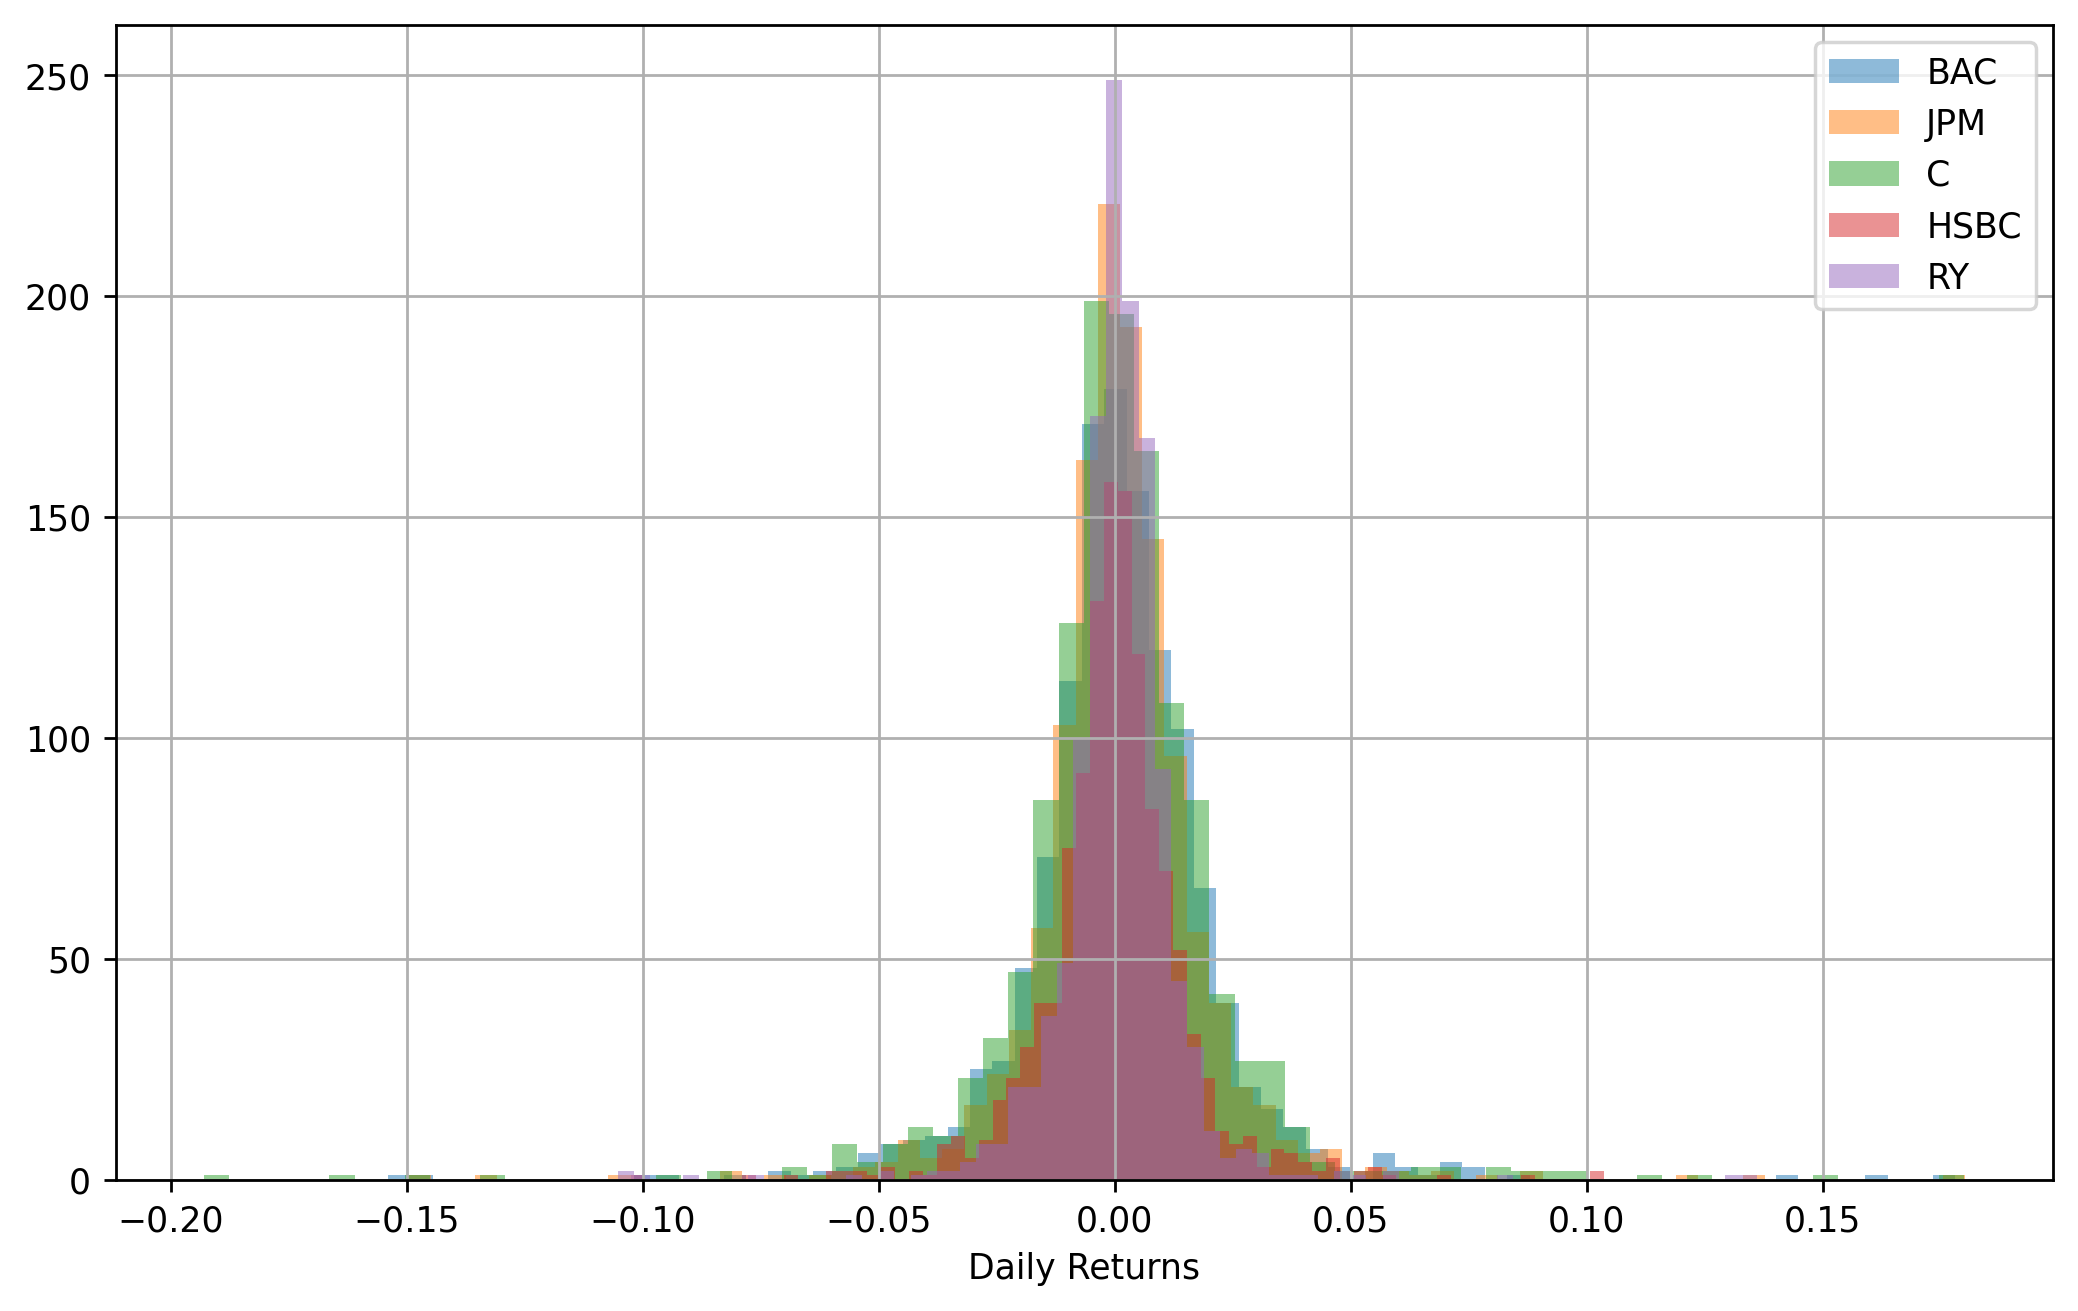

In [10]:
plt.figure(figsize=(10,6), dpi=250)
for stock_name, stock_df in portfolio_dict.items():
    stock_df['Adj Close'].pct_change(1).hist(label=stock_name, alpha=0.5, bins=70)
    
plt.xlabel("Daily Returns")
plt.legend()

#### \\$1000 cumulative returns. 

In [11]:
bac_rets = BAC['Adj Close'].pct_change(1)[1:]
cumulative_ret = (bac_rets+1).cumprod()
bac_1000 = cumulative_ret*1000

In [12]:
plt.figure(figsize=(10,4), dpi=200)
bac_1000.plot(ylabel="Dollar Values of BAC Stock")

<Axes: xlabel='Date', ylabel='Dollar Values of BAC Stock'>

**The Annualized Sharpe Ratios for each stock in the portfolio.**

In [13]:
def compute_sharpe_ratio(data, risk_free_rate = 0):
    mean_return = data["Adj Close"].pct_change(1).mean()
    std = data["Adj Close"].pct_change(1).std()
    sharpe_ratio = (mean_return-risk_free_rate) / std
    return (252**0.5) *sharpe_ratio

In [14]:
 for ticker, df in portfolio_dict.items():
    print(f"{ticker} Annualized Sharpe Ratio is: {compute_sharpe_ratio(df)}")

BAC Annualized Sharpe Ratio is: 0.7947267104783101
JPM Annualized Sharpe Ratio is: 0.8165069200136574
C Annualized Sharpe Ratio is: 0.47918276513516356
HSBC Annualized Sharpe Ratio is: 0.03389350547471227
RY Annualized Sharpe Ratio is: 0.7323176596668234


------------------
### Part Two:  Volume Analysis 
-------------

**A plot showing the daily volume of stock traded over the time period of 5 years.**

In [15]:
fig, ax = plt.subplots(dpi=150, figsize=(10,3))
BAC['Volume'].plot(ax=ax, label='BAC')
JPM["Volume"].plot(ax=ax, label='JPM')
RY['Volume'].plot(ax=ax, label='RY')
HSBC['Volume'].plot(ax=ax, label='HSBC')
C['Volume'].plot(ax=ax, label='C')
plt.legend(loc=(1.1,0.5))

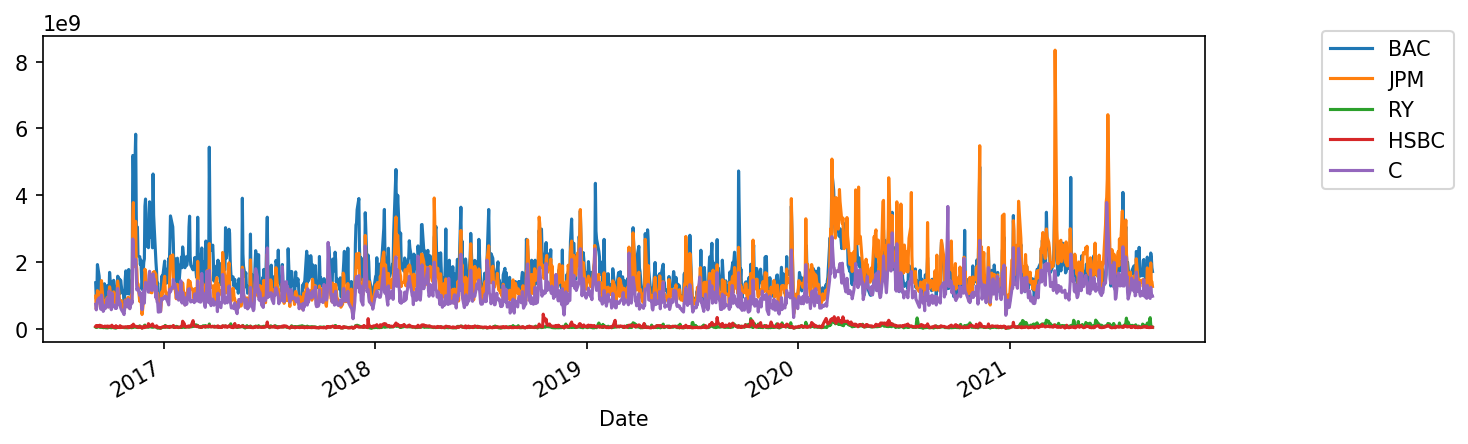

In [16]:
fig, ax = plt.subplots(figsize=(10,3), dpi=150)
(BAC["Volume"]*BAC["Adj Close"]).plot(ax=ax, label="BAC")
(JPM["Volume"]*JPM["Adj Close"]).plot(ax=ax, label="JPM")
(RY["Volume"]*RY["Adj Close"]).plot(ax=ax, label="RY")
(HSBC["Volume"]*HSBC["Adj Close"]).plot(ax=ax, label="HSBC")
(C["Volume"]*C["Adj Close"]).plot(ax=ax, label="C")
plt.legend(loc=(1.1,0.5))

In [17]:
(JPM["Volume"]*JPM["Adj Close"]).max()

8345011203.784801

In [19]:
 (JPM['Volume']*JPM['Adj Close']).idxmax()

Timestamp('2021-03-19 00:00:00')

--------
### Part Three: Technical Analysis
----

**A plot showing the Adj. Close Price along with the 60 day moving average of the price on the same plot.**

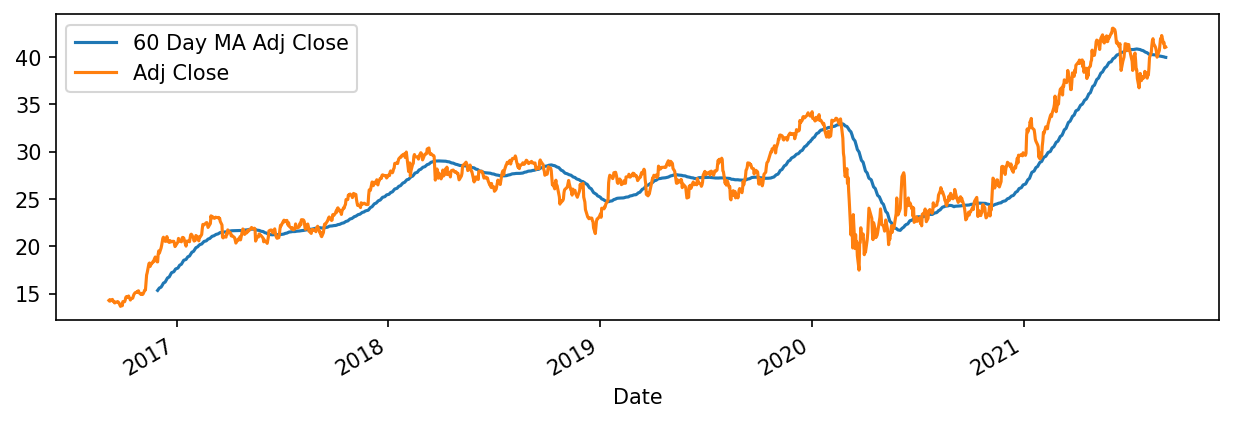

In [18]:
plt.figure(figsize=(10,3),dpi=150)
BAC['Adj Close'].rolling(window=60).mean().plot(label='60 Day MA Adj Close')
BAC['Adj Close'].plot(label='Adj Close')
plt.legend()

**Creating Bollinger Bands.**

<Axes: xlabel='Date'>

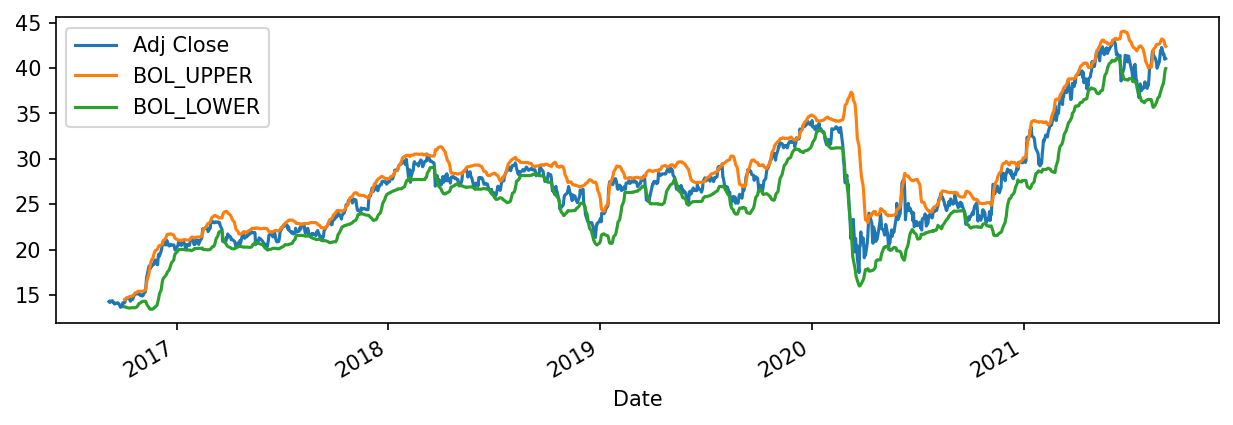

In [19]:
 fig,ax = plt.subplots(figsize=(10,3),dpi=150)
BAC['MA'] = BAC['Adj Close'].rolling(20).mean()
BAC['STD'] = BAC['Adj Close'].rolling(20).std()
BAC['BOL_UPPER'] = BAC['MA'] + 2*BAC['STD']
BAC['BOL_LOWER'] = BAC['MA'] - 2*BAC['STD']
BAC[['Adj Close','BOL_UPPER','BOL_LOWER']].plot(ax=ax)

-----